<h1>Data Cleaning</h1>

In [110]:
# 1) Imports and load
import pandas as pd
import numpy as np

df = pd.read_csv("CarPrice_Assignment.csv")

# 2) Basic trims
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip().str.lower()

# 3) CarCompany from CarName
df["carcompany"] = df["carmodels"].str.split(" ").str[0]

# 4) Optional: normalize doornumber to numeric
door_map = {"two":2, "four":4}
df["numberofdoors"] = df["doornum"].map(door_map).astype("Int64")

# 5) Drop cols not needed for modeling
df.drop(columns=["car_ID",'doornum'], inplace=True)

df.head(5)

,symboling,carmodels,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,numberofdoors
0,3,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,2
1,3,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,2
2,1,alfa-romero quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,2
3,2,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,4
4,2,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,4


<h1>Exploratory Data Analysis (EDA)</h1>

<h2>1️⃣ Dataset ka size, type aur basic stats samajhna</h2>

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carmodels         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [112]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,numberofdoors
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,3.121951
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.994966
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,2.0
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,2.0
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,4.0
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,4.0
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,4.0


<h2>2️⃣ Target Variable (price) ka distribution</h2>

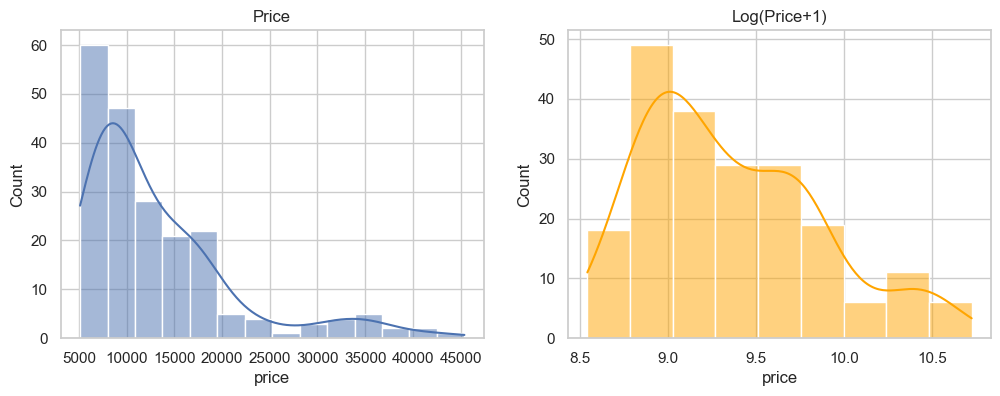

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(df["price"], kde=True, ax=ax[0])
ax[0].set_title("Price")

sns.histplot(np.log1p(df["price"]), kde=True, ax=ax[1], color="orange")
ax[1].set_title("Log(Price+1)")
plt.show()


<h2>3️⃣ Correlation Matrix</h2>

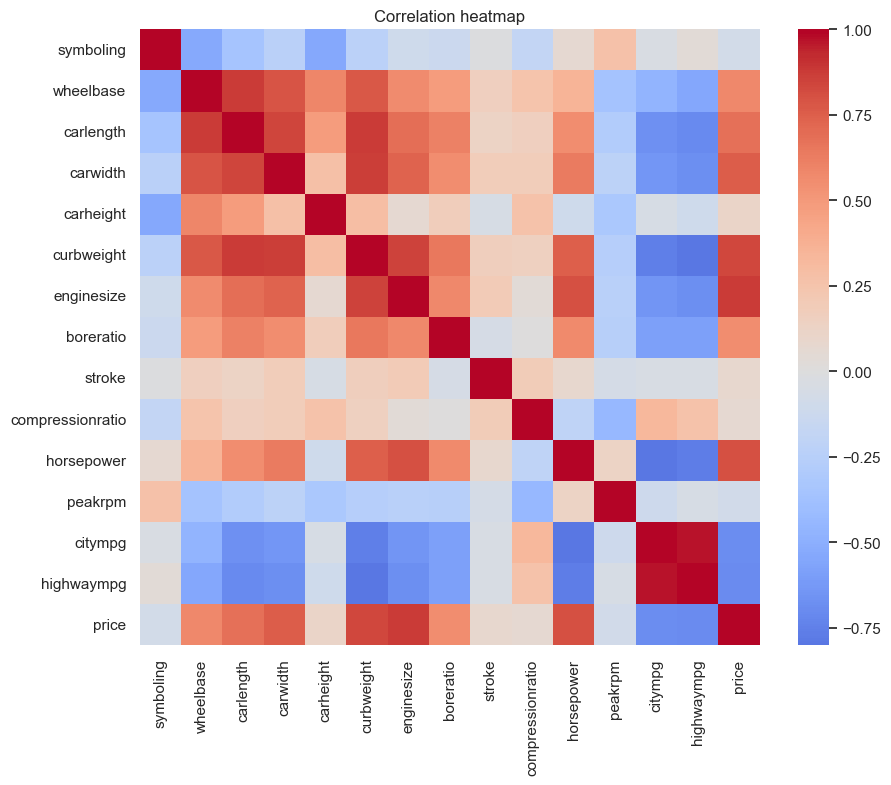

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [114]:
num_cols = ["symboling","wheelbase","carlength","carwidth","carheight","curbweight",
            "enginesize","boreratio","stroke","compressionratio","horsepower",
            "peakrpm","citympg","highwaympg","price"]

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False, center=0)
plt.title("Correlation heatmap")
plt.show()

# Top correlations with price
corr_with_price = df[num_cols].corr()["price"].sort_values(ascending=False)
print(corr_with_price)


<h2>4️⃣ Categorical Features vs Price (Boxplots)</h2>

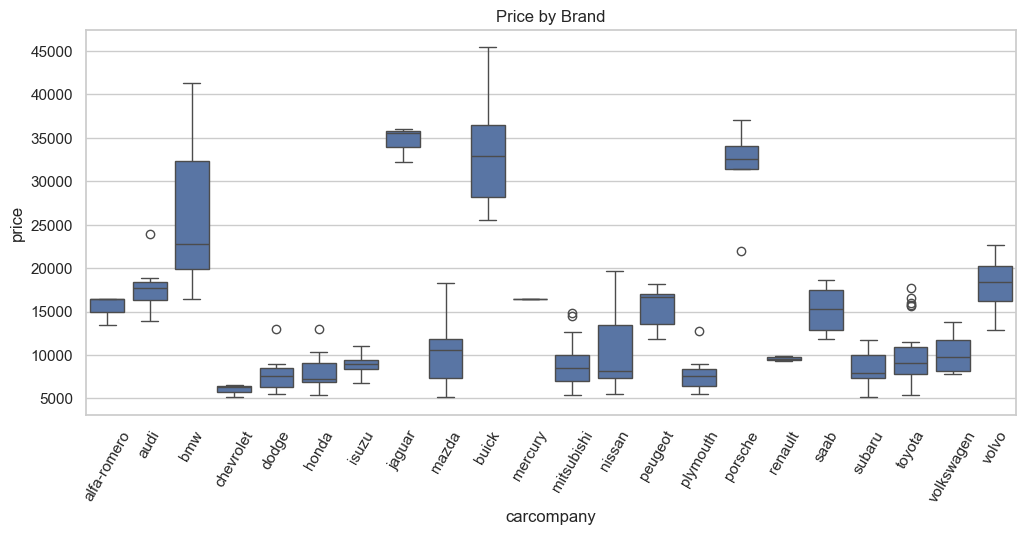

In [115]:
plt.figure(figsize=(12,5))
sns.boxplot(x='carcompany', y='price', data=df)
plt.xticks(rotation=60)
plt.title("Price by Brand")
plt.show()


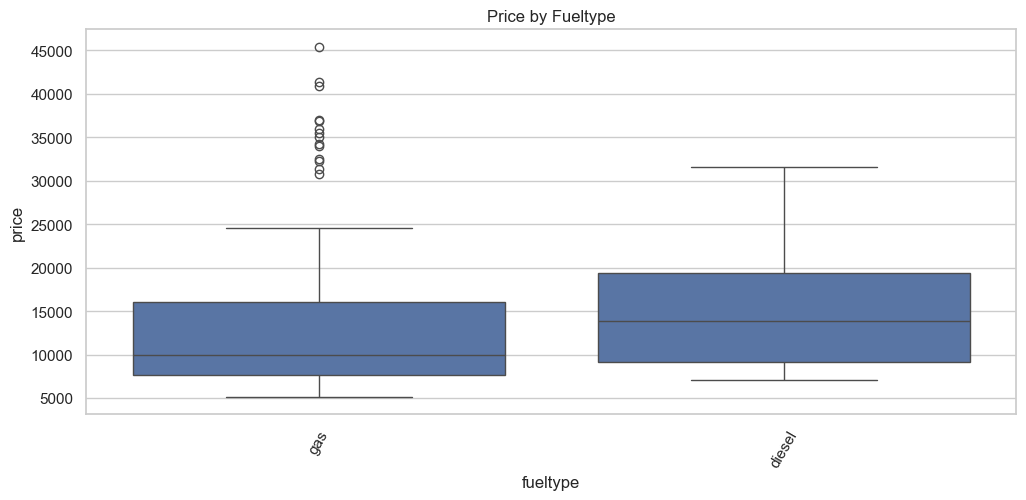

In [116]:
plt.figure(figsize=(12,5))
sns.boxplot(x='fueltype', y='price', data=df)
plt.xticks(rotation=60)
plt.title("Price by Fueltype")
plt.show()


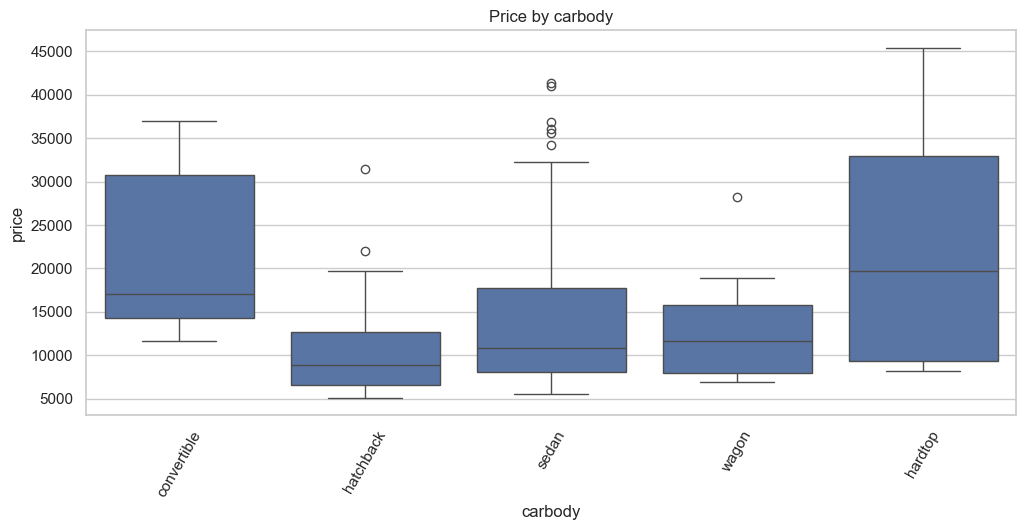

In [117]:
plt.figure(figsize=(12,5))
sns.boxplot(x='carbody', y='price', data=df)
plt.xticks(rotation=60)
plt.title("Price by carbody")
plt.show()


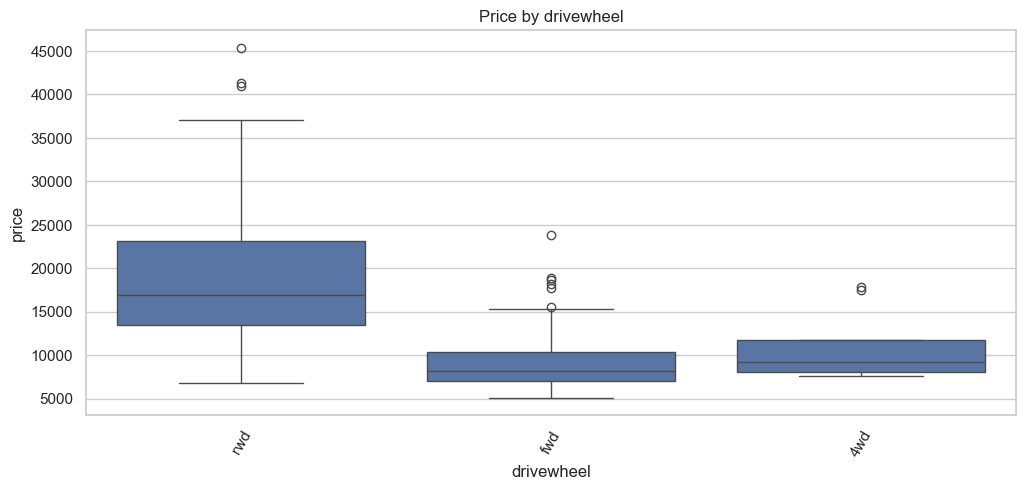

In [118]:
plt.figure(figsize=(12,5))
sns.boxplot(x='drivewheel', y='price', data=df)
plt.xticks(rotation=60)
plt.title("Price by drivewheel")
plt.show()


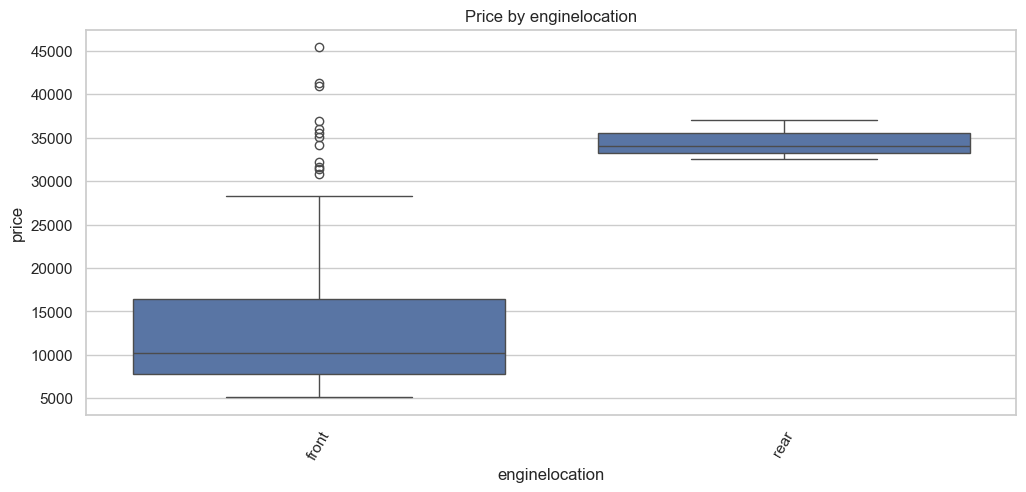

In [119]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="enginelocation", y="price")
plt.xticks(rotation=60)
plt.title("Price by enginelocation")
plt.show()


<h2>5️⃣ Outlier Detection</h2>

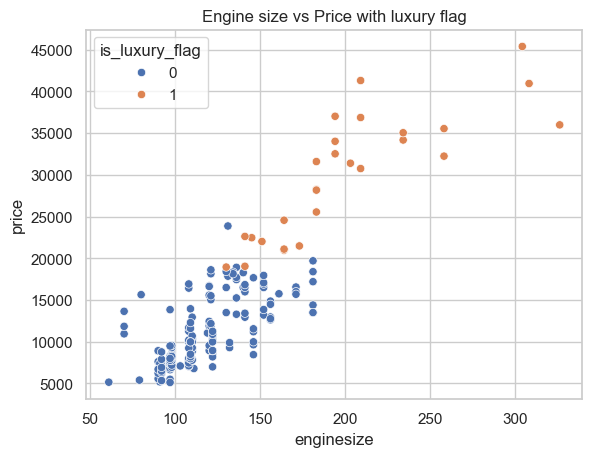

In [120]:
# Simple rule-based flags
df["is_luxury_flag"] = ((df["carcompany"].isin(["jaguar","porsche","bmw","buick","volvo"])) &
                        (df["price"] > df["price"].quantile(0.85))).astype(int)

sns.scatterplot(data=df, x="enginesize", y="price", hue="is_luxury_flag")
plt.title("Engine size vs Price with luxury flag")
plt.show()


In [121]:
import plotly.express as px

# 1️⃣ Luxury flag
luxury_brands = ["jaguar", "porsche", "bmw", "buick", "volvo"]
df['is_luxury_flag'] = df['carcompany'].apply(lambda x: 1 if x in luxury_brands else 0)

# 2️⃣ Fuel type numeric mapping
df['fueltype_num'] = df['fueltype'].map({'gas': 0, 'diesel': 1})

# 3️⃣ Interactive 3D scatter with premium styling
fig = px.scatter_3d(
    df,
    x='enginesize',
    y='price',
    z='fueltype_num',
    color='is_luxury_flag',
    symbol='fueltype',
    size='horsepower',  # point size = horsepower for better visual meaning
    hover_data={
        'carmodels': True,
        'carcompany': True,
        'fueltype': True,
        'enginesize': True,
        'horsepower': True,
        'price': True,
        'fueltype_num': False,
        'is_luxury_flag': False
    },
    color_discrete_map={0: '#1f77b4', 1: '#ff7f0e'},  # Blue = Non-Luxury, Orange = Luxury
    title='🚗 Engine Size vs Price vs Fuel Type ',
    labels={
        'enginesize': 'Engine Size (cc)',
        'price': 'Price ($)',
        'fueltype_num': 'Fuel Type (0=Gas, 1=Diesel)'
    }
)

# 4️⃣ Layout & axis styling
fig.update_traces(
    marker=dict(
        opacity=0.85,
        line=dict(width=1, color='DarkSlateGrey')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Engine Size (cc)', backgroundcolor='white', gridcolor='lightgrey', zerolinecolor='grey'),
        yaxis=dict(title='Price ($)', backgroundcolor='white', gridcolor='lightgrey', zerolinecolor='grey'),
        zaxis=dict(title='Fuel Type ', backgroundcolor='white', gridcolor='lightgrey', zerolinecolor='grey')
    ),
    legend=dict(
        title='Fuel type',
        itemsizing='constant',
        orientation='h',  # horizontal legend
        yanchor='bottom',
        y=1.02,
        xanchor='left',
        x=0.5,
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()


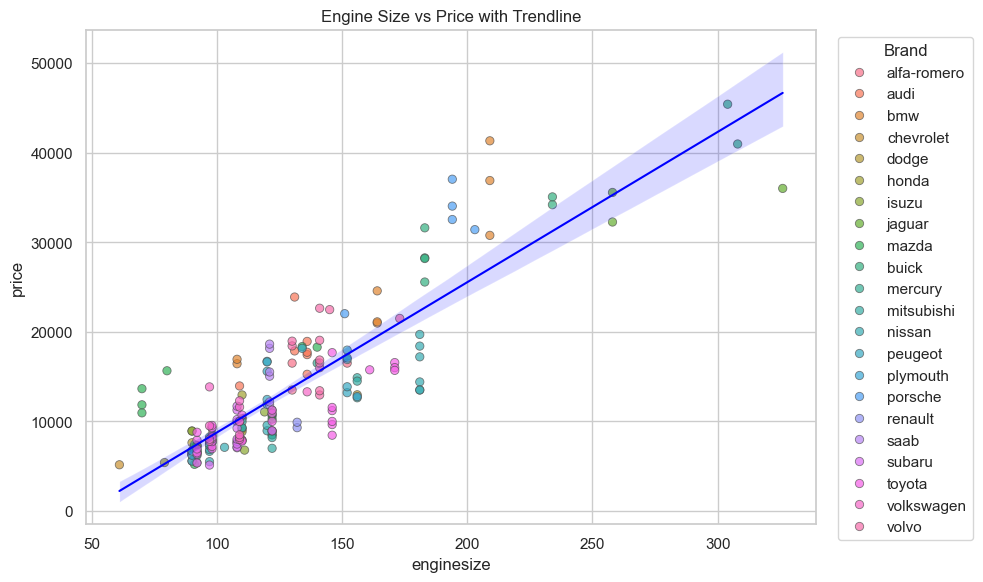

In [122]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x='enginesize', y='price', hue='carcompany',
                     alpha=0.7, edgecolor='0.3', linewidth=0.6)
sns.regplot(data=df, x='enginesize', y='price', scatter=False, ax=ax, color='blue', line_kws={'lw':1.5})
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True, title='Brand')
ax.set_title('Engine Size vs Price with Trendline')
plt.tight_layout()
plt.show()


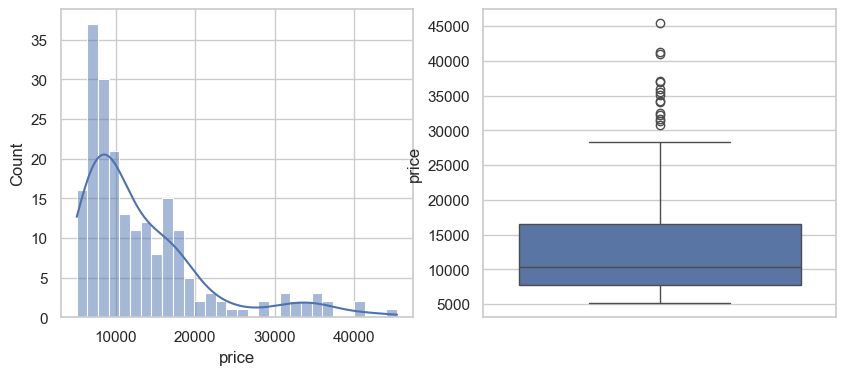

In [123]:
import seaborn as sns, matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df['price'], bins=30, kde=True, ax=ax[0])  # distribution + smooth density
sns.boxplot(y=df['price'], ax=ax[1])                    # outliers visible
plt.show()


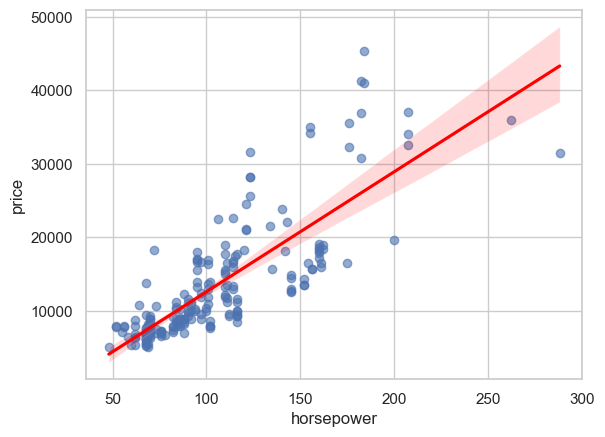

In [124]:
sns.regplot(data=df, x='horsepower', y='price', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()


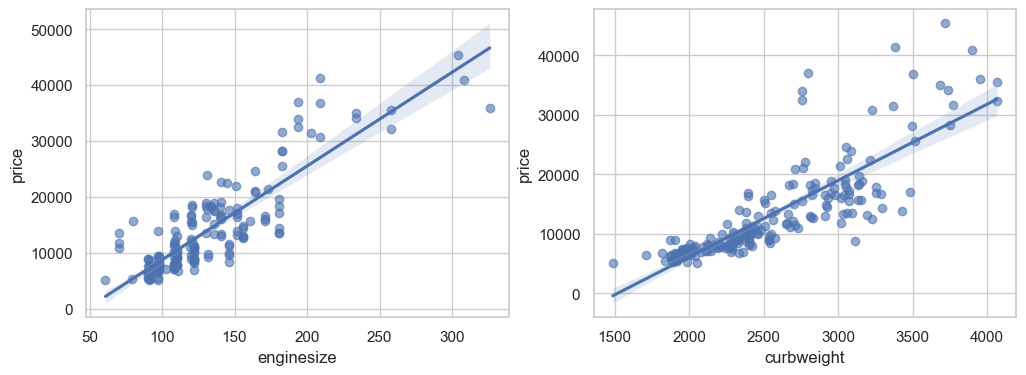

In [125]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.regplot(data=df, x='enginesize', y='price', ax=ax[0], scatter_kws={'alpha':0.6})
sns.regplot(data=df, x='curbweight', y='price', ax=ax[1], scatter_kws={'alpha':0.6})
plt.show()


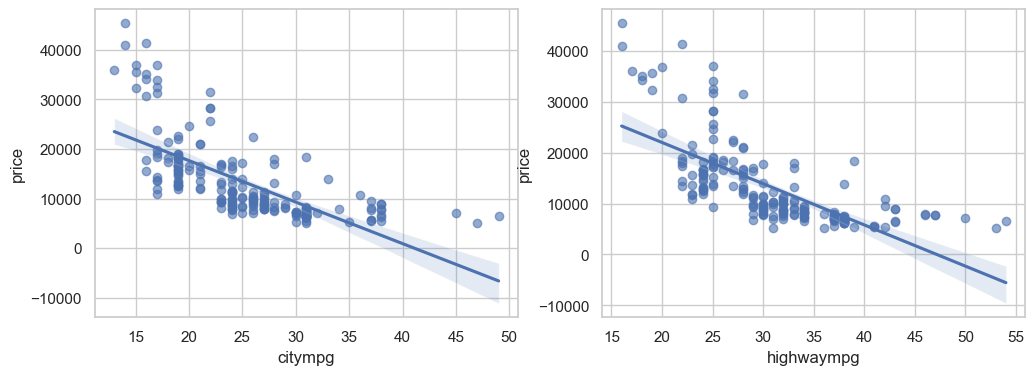

In [126]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.regplot(data=df, x='citympg', y='price', ax=ax[0], scatter_kws={'alpha':0.6})
sns.regplot(data=df, x='highwaympg', y='price', ax=ax[1], scatter_kws={'alpha':0.6})
plt.show()


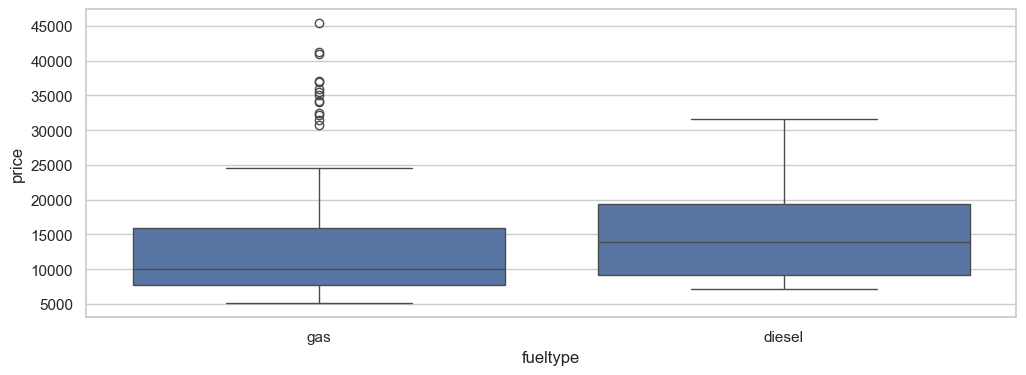

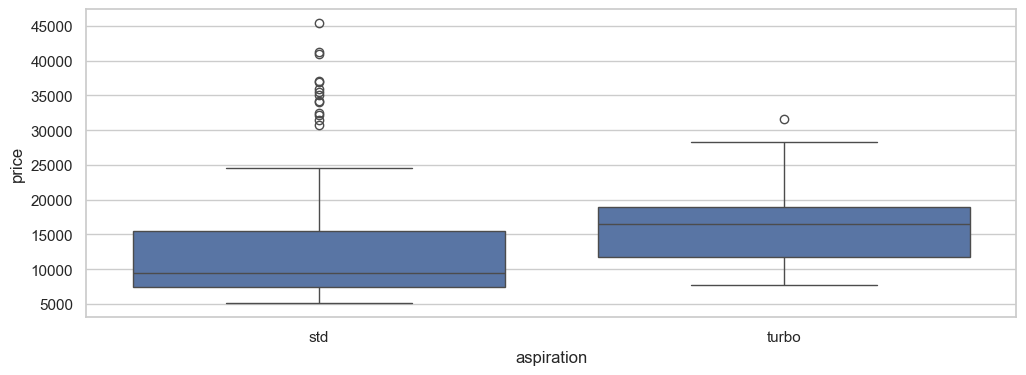

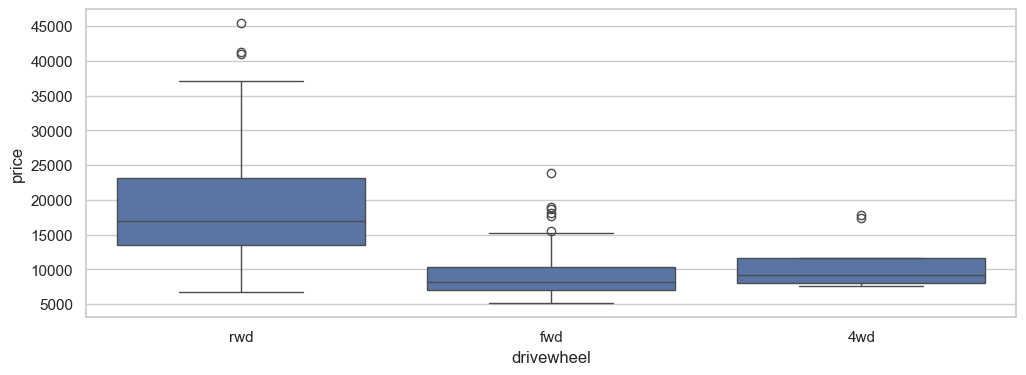

In [127]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='fueltype', y='price')
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='aspiration', y='price')
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='drivewheel', y='price')
plt.show()


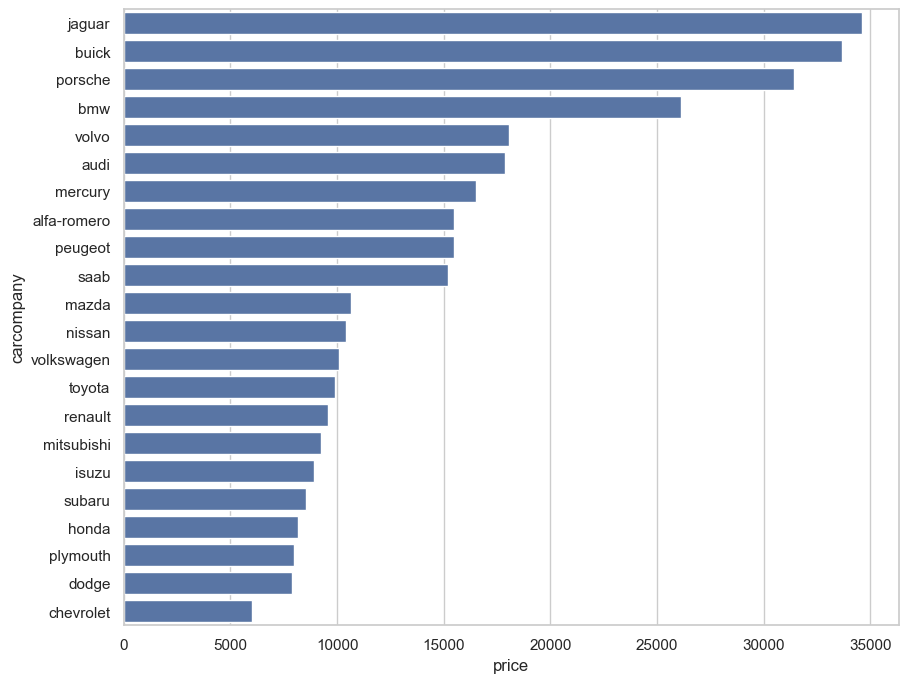

In [128]:
brand_mean = df.groupby('carcompany', as_index=False)['price'].mean().sort_values('price', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=brand_mean, y='carcompany', x='price', orient='h')
plt.show()


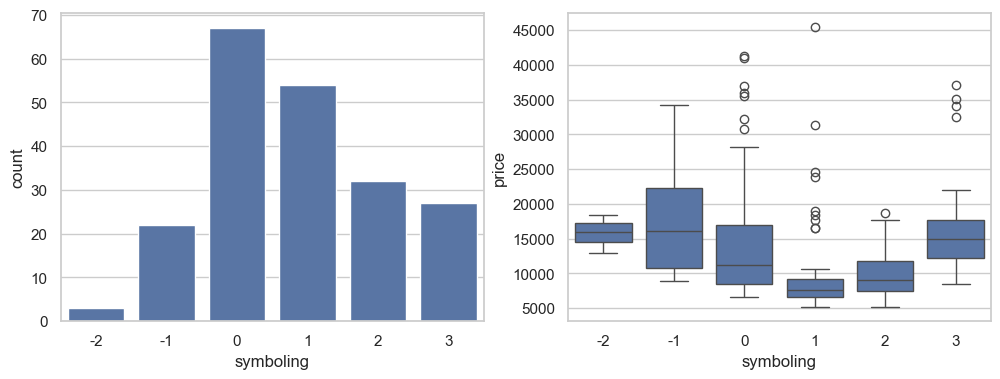

In [129]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(data=df, x='symboling', ax=ax[0])
sns.boxplot(data=df, x='symboling', y='price', ax=ax[1])
plt.show()


<h1>Feature engineering and preprocessing</h1>

In [130]:
df_fe = df.copy()
df_fe["power_to_weight"] = df_fe["horsepower"] / df_fe["curbweight"]
df_fe["avg_mpg"] = (df_fe["citympg"] + df_fe["highwaympg"]) / 2
df_fe["bore_stroke_ratio"] = df_fe["boreratio"] / df_fe["stroke"]
df_fe["length_width"] = df_fe["carlength"] * df_fe["carwidth"]
df_fe["hp_per_cc"] = df_fe["horsepower"] / df_fe["enginesize"]

target = np.log1p(df_fe["price"])  # log-transform target
df_fe = df_fe.drop(columns=["price"])


In [131]:
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import numpy as np

X = df_fe.copy()

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64","float64","Int64"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ]
)

# 1) Linear baseline (Ridge)
ridge = RidgeCV(alphas=np.logspace(-3,3,13), cv=5)

ridge_pipe = Pipeline(steps=[("prep", preprocess), ("model", ridge)])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"r2":"r2", "neg_mae":"neg_mean_absolute_error", "neg_rmse":"neg_root_mean_squared_error"}
res_ridge = cross_validate(ridge_pipe, X, target, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

def summarize_cv(name, res):
    r2 = res["test_r2"].mean()
    mae = -res["test_neg_mae"].mean()
    rmse = -res["test_neg_rmse"].mean()
    print(f"{name}: R2={r2:.3f} | MAE={mae:.3f} (log-price) | RMSE={rmse:.3f}")

summarize_cv("Ridge", res_ridge)

# 2) Lasso (feature selection tendency)
lasso = LassoCV(alphas=np.logspace(-3,1,20), cv=5, max_iter=10000, random_state=42)
lasso_pipe = Pipeline(steps=[("prep", preprocess), ("model", lasso)])
res_lasso = cross_validate(lasso_pipe, X, target, cv=cv, scoring=scoring, n_jobs=-1)
summarize_cv("Lasso", res_lasso)

# 3) RandomForest (non-linear baseline)
rf = RandomForestRegressor(
    n_estimators=600, max_depth=None, min_samples_leaf=2,
    random_state=42, n_jobs=-1
)
rf_pipe = Pipeline(steps=[("prep", preprocess), ("model", rf)])
res_rf = cross_validate(rf_pipe, X, target, cv=cv, scoring=scoring, n_jobs=-1)
summarize_cv("RandomForest", res_rf)


Ridge: R2=0.911 | MAE=0.117 (log-price) | RMSE=0.149
Lasso: R2=0.894 | MAE=0.126 (log-price) | RMSE=0.162
RandomForest: R2=0.917 | MAE=0.111 (log-price) | RMSE=0.142


In [132]:
best_pipe = rf_pipe  # or ridge_pipe based on CV
best_pipe.fit(X, target)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [133]:
# Save artifacts
joblib.dump({"pipeline": best_pipe, "num_cols": num_cols, "cat_cols": cat_cols}, "carprice_model.joblib")
print("Saved carprice_model.joblib")

Saved carprice_model.joblib


In [134]:
df.head()

,symboling,carmodels,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,numberofdoors,is_luxury_flag,fueltype_num
0,3,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,alfa-romero,2,0,0
1,3,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,alfa-romero,2,0,0
2,1,alfa-romero quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,alfa-romero,2,0,0
3,2,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,audi,4,0,0
4,2,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,audi,4,0,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carmodels         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1